<a href="https://colab.research.google.com/github/alper-tasci/Projects/blob/master/Police_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt 

In [0]:
df = pd.read_csv('/content/drive/My Drive/ca_san_francisco_2019_12_17.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(905070, 22)

In [0]:
df.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,vehicular,False,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,vehicular,False,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,vehicular,False,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,vehicular,False,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [0]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

In [0]:

# Choose cloumns
df = df.loc[:, ['raw_row_number','date', 'time', 'location', 'district',
                'subject_age', 'subject_race', 'subject_sex', 'arrest_made',
                'citation_issued', 'outcome',
                'search_conducted', 'search_vehicle', 'reason_for_stop']]

In [0]:
df.head()

,raw_row_number,date,time,location,district,subject_age,subject_race,subject_sex,arrest_made,citation_issued,outcome,search_conducted,search_vehicle,reason_for_stop
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,NaN,NaN,asian/pacific islander,female,False,False,warning,False,False,Mechanical or Non-Moving Violation (V.C.)
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,NaN,NaN,black,male,False,True,citation,False,False,Mechanical or Non-Moving Violation (V.C.)
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,NaN,NaN,hispanic,male,False,True,citation,False,False,Mechanical or Non-Moving Violation (V.C.)
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,NaN,NaN,hispanic,male,False,False,warning,False,False,Mechanical or Non-Moving Violation (V.C.)
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,NaN,NaN,white,male,False,True,citation,False,False,Mechanical or Non-Moving Violation (V.C.)


In [0]:
# Count Null Rows and Drop (subset) null rows
# print(df.isnull().sum())
df.dropna(subset=['time', 'date', 'location','district'], inplace=True)
# print(df.isnull().sum())
#convert type of some columns

In [0]:
df.shape

(852805, 14)

In [0]:
df = df.astype({'arrest_made':'bool',
                'citation_issued':'bool',
                'search_conducted':'bool',
                'search_vehicle':'bool'})

In [0]:
# Fill Na with average
#df.fillna(df.mean(), inplace=True)

In [0]:
df.shape

(852805, 14)

In [0]:
# Merge and Convert [date] & time as new column [Date_time]
df['date_time'] = df.date + " " + df.time
df['date_time'] = pd.to_datetime(df.date_time)
print(df.date_time.isnull().sum())




0


In [0]:
# Set index date_time
df.sort_values(by='date_time', inplace=True)
df.set_index('raw_row_number', inplace=True)




In [0]:
df.head()

,date,time,location,district,subject_age,subject_race,subject_sex,arrest_made,citation_issued,outcome,search_conducted,search_vehicle,reason_for_stop,date_time
raw_row_number,,,,,,,,,,,,,,
1,2007-01-01,00:11:00,POLK AT OFARRELL,E,20.0,asian/pacific islander,male,False,False,warning,False,False,Moving Violation,2007-01-01 00:11:00
2,2007-01-01,00:23:00,ELLIS AND TAYLOR,J,32.0,other,male,False,False,warning,False,False,MPC Violation,2007-01-01 00:23:00
3,2007-01-01,00:28:00,101/ARMY,D,27.0,hispanic,male,False,True,citation,False,False,Moving Violation,2007-01-01 00:28:00
4,2007-01-01,00:30:00,CHARLES J BRENNAN ANDMARKET,J,23.0,black,male,False,True,citation,True,True,Moving Violation,2007-01-01 00:30:00
5,2007-01-01,00:30:00,EMBARCADERO/BROADWAY,E,24.0,hispanic,female,False,True,citation,False,False,Moving Violation,2007-01-01 00:30:00


# **Do The Genders Commits Different Violations**

In [0]:
gender_outcome=pd.crosstab(index=df.outcome,columns=df.subject_sex )

df['outcome_arrest'] = df.outcome[df.outcome=='arrest'] 
gender_outcome_rate= pd.crosstab(index=df.outcome_arrest, columns=df.subject_sex, normalize=True)
gender_outcome_rate

subject_sex,female,male
outcome_arrest,,
arrest,0.211783,0.788217


In [0]:
gender_outcome

subject_sex,female,male
outcome,,
arrest,2430,9044
citation,177236,417571
warning,68222,163240


In [0]:
male_outcome_rates = df[df.subject_sex=='male']['outcome'].value_counts(normalize=True)
male_outcome_rates

citation    0.707921
warning     0.276746
arrest      0.015333
Name: outcome, dtype: float64

In [0]:
female_outcome_rates = df[df['subject_sex']=='female']['outcome'].value_counts(normalize =True)
female_outcome_rates

citation    0.714984
warning     0.275213
arrest      0.009803
Name: outcome, dtype: float64

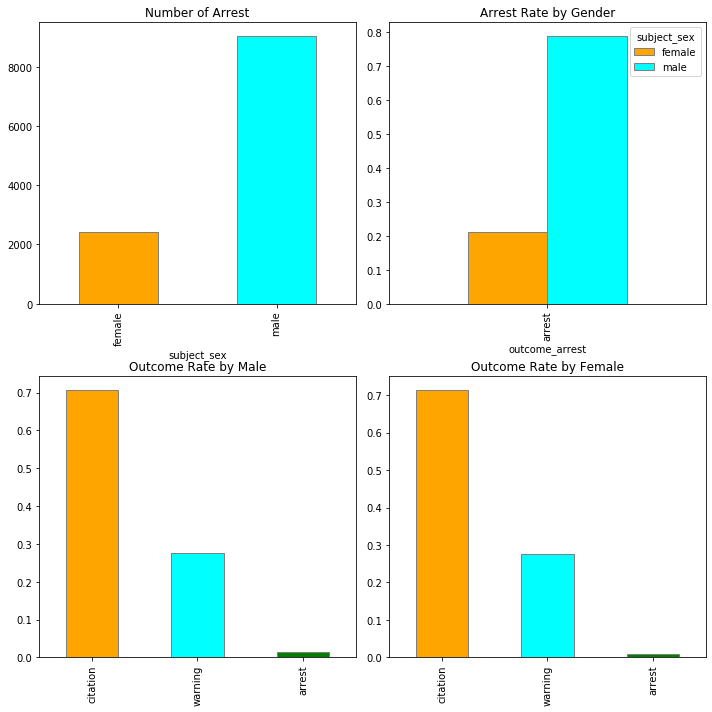

In [0]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=[10,10])
color =['orange','cyan','green', 'blue', 'red', 'purple']
edgecolor = ['grey']

title2 = 'Arrest Rate by Gender'
ax1 = gender_outcome.loc['arrest'].plot(kind='bar', color=color, edgecolor=edgecolor,ax=ax1)
ax1.set_title('Number of Arrest')

ax2 = gender_outcome_rate.plot(kind='bar', color=color, edgecolor=edgecolor, title=title2,ax=ax2 )

ax3.set_title('Outcome Rate by Male')
ax3= male_outcome_rates.plot(kind='bar',color=color, edgecolor=edgecolor,ax=ax3)

ax4 = female_outcome_rates.plot(kind='bar',color=color, edgecolor=edgecolor,ax=ax4)
ax4.set_title('Outcome Rate by Female')

plt.tight_layout(h_pad=0)
plt.savefig(fname='gender_outcome')
plt.show()

# Comparing stop outcomes according to Race

In [0]:
outcomes_by_race = pd.crosstab(df.outcome,df.subject_race)
outcomes_by_race.sort_values(by=['asian/pacific islander','black','hispanic','other','white'], inplace=True)
outcomes_by_race
outcomes_rate_race = pd.crosstab(index=df.outcome, columns=df.subject_race, normalize=True)

In [0]:
outcomes_by_race

subject_race,asian/pacific islander,black,hispanic,other,white
outcome,,,,,
arrest,1182,3362,2198,880,3852
warning,29983,57376,29288,21417,93398
citation,115732,79069,72769,74380,252857


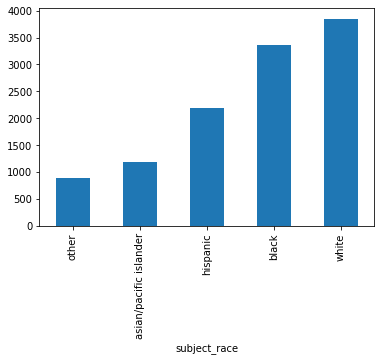

In [0]:
# Race based number of arrest 
outcomes_by_race.loc['arrest'].sort_values().plot(kind='bar')

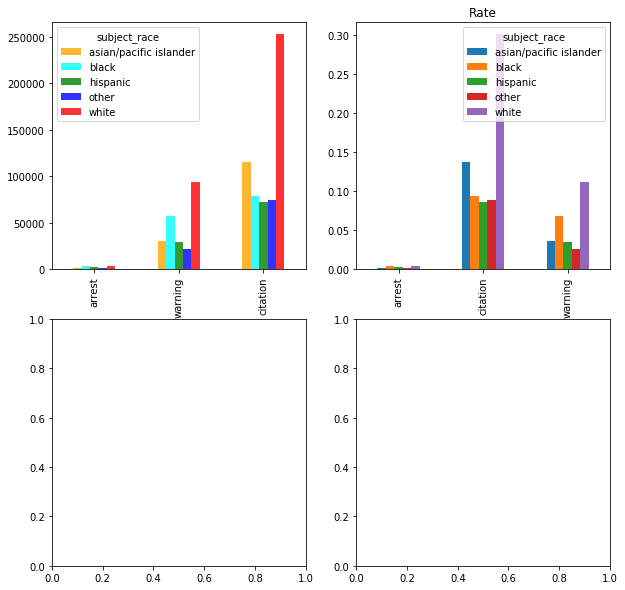

In [0]:

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=[10,10])
outcomes_by_race.sort_values(by=['black','white']).plot(kind='bar', ax=ax1, color=color, alpha=0.8)
outcomes_rate_race.sort_values(by='outcome').plot(kind='bar', ax=ax2, title='Rate')
plt.show()

#Arrest Outcomes

In [0]:
df.head()

,date,time,location,district,subject_age,subject_race,subject_sex,arrest_made,citation_issued,outcome,search_conducted,search_vehicle,reason_for_stop,date_time,outcome_arrest
raw_row_number,,,,,,,,,,,,,,,
1,2007-01-01,00:11:00,POLK AT OFARRELL,E,20.0,asian/pacific islander,male,False,False,warning,False,False,Moving Violation,2007-01-01 00:11:00,NaN
2,2007-01-01,00:23:00,ELLIS AND TAYLOR,J,32.0,other,male,False,False,warning,False,False,MPC Violation,2007-01-01 00:23:00,NaN
3,2007-01-01,00:28:00,101/ARMY,D,27.0,hispanic,male,False,True,citation,False,False,Moving Violation,2007-01-01 00:28:00,NaN
4,2007-01-01,00:30:00,CHARLES J BRENNAN ANDMARKET,J,23.0,black,male,False,True,citation,True,True,Moving Violation,2007-01-01 00:30:00,NaN
5,2007-01-01,00:30:00,EMBARCADERO/BROADWAY,E,24.0,hispanic,female,False,True,citation,False,False,Moving Violation,2007-01-01 00:30:00,NaN


In [0]:
df[df.outcome=='arrest'].groupby('subject_race')['arrest_made',].sum()

,arrest_made
subject_race,
asian/pacific islander,1182.0
black,3362.0
hispanic,2198.0
other,880.0
white,3852.0


In [0]:
group = df[['subject_age', 'subject_race','subject_sex', 'outcome' ]].groupby(['outcome','subject_race','subject_sex']).agg(['mean','count'])


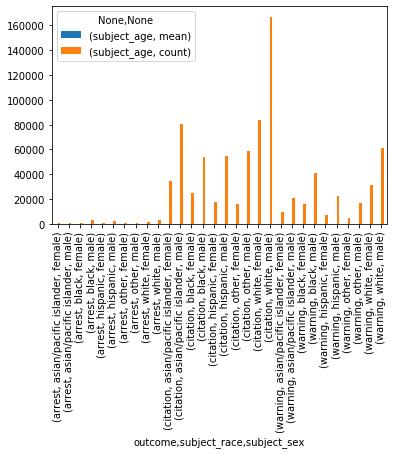

In [0]:
group.plot(kind='bar')

In [0]:
df.groupby('subject_age')['subject_age'].count()

subject_age
10.0     10
11.0      3
12.0      9
13.0     13
14.0     32
         ..
96.0      5
97.0      4
98.0      2
99.0     34
100.0     4
Name: subject_age, Length: 91, dtype: int64

In [0]:
age_hist = df.groupby('subject_age')['subject_age'].count()


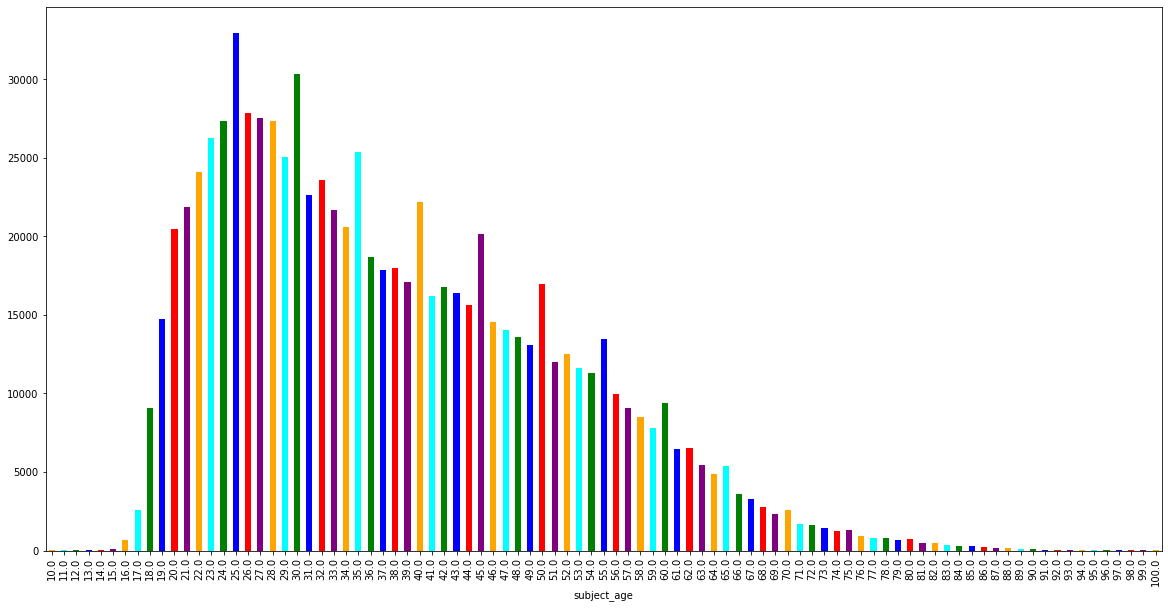

In [0]:
age_hist.plot(kind='bar', xticks=[10,20,30,40,50,60,70,80,90,100], figsize=(20,10),color=color)
#it is interesting, 25,30,35... there is an increase in driver ages every five year after 25.

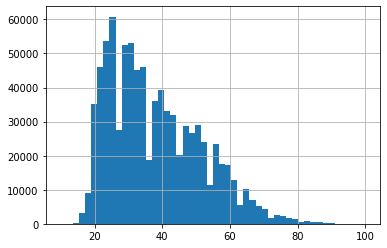

In [0]:
df.subject_age.hist(bins=50)
plt.show()

In [0]:
race_age_hist = df.groupby(['subject_race','subject_age'])['subject_age'].count()
race_age_hist

subject_race            subject_age
asian/pacific islander  10.0            1
                        12.0            2
                        13.0            4
                        14.0            5
                        15.0            9
                                       ..
white                   96.0            5
                        97.0            4
                        98.0            1
                        99.0           14
                        100.0           4
Name: subject_age, Length: 428, dtype: int64

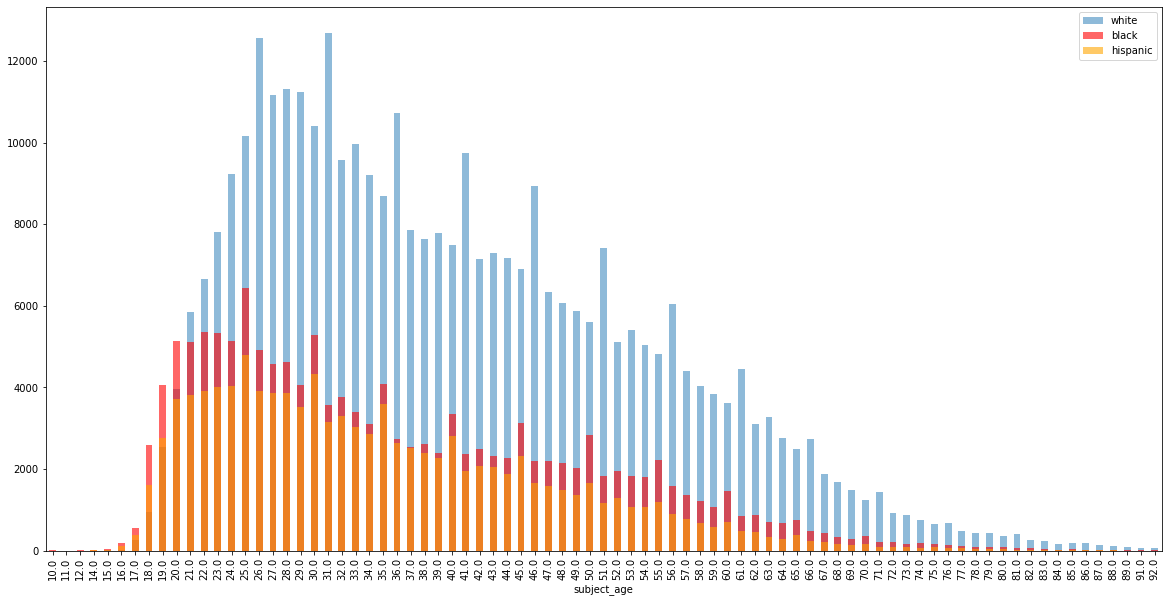

In [0]:
plt.plot()
race_age_hist.loc['white'].plot(kind='bar',alpha=0.5, figsize=(20,10))
race_age_hist.loc['black'].plot(kind='bar', color='red', alpha=0.6, figsize=(20,10))
race_age_hist.loc['hispanic'].plot(kind='bar', color='orange', alpha=0.6, figsize=(20,10))
plt.legend(['white','black','hispanic'],)
plt.show()

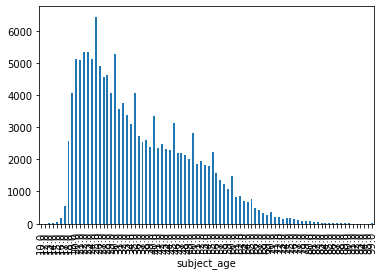

In [0]:
race_age_hist.loc['black'].plot(kind='bar')

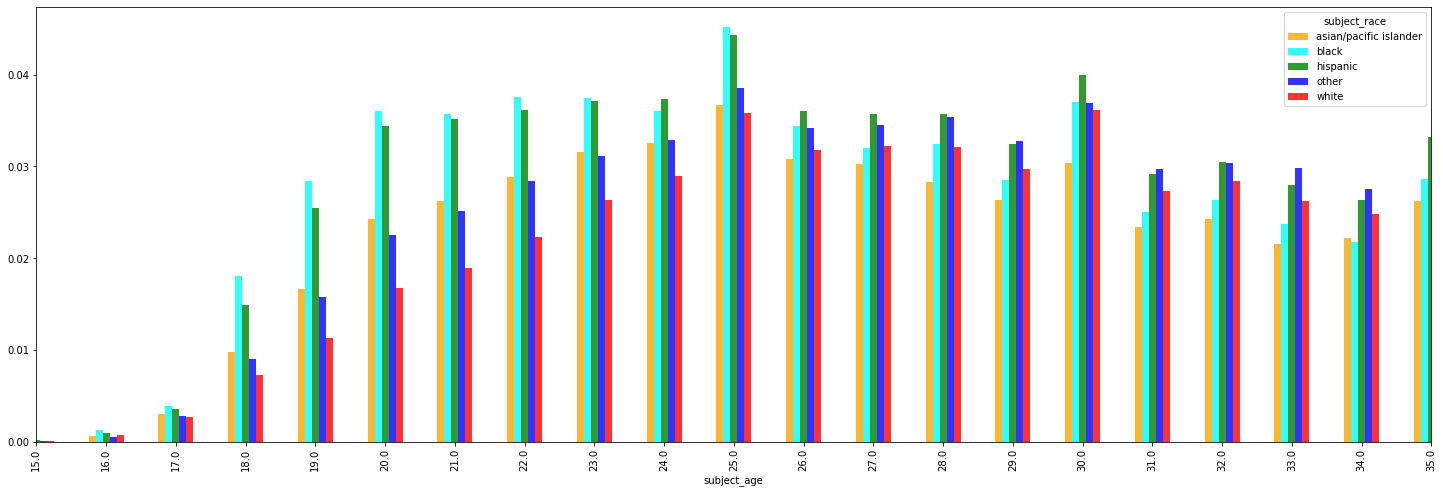

In [0]:
fig, ax = plt.subplots()
pd.crosstab(index=df.subject_age,columns=df.subject_race,normalize='columns' ).plot(kind='bar', 
                                                                                    figsize=(25,8), 
                                                                                    color=color, 
                                                                                    alpha=0.8, 
                                                                                    legend=True, 
                                                                                    ax=ax)
ax.set_xlim([5,25])
plt.show()

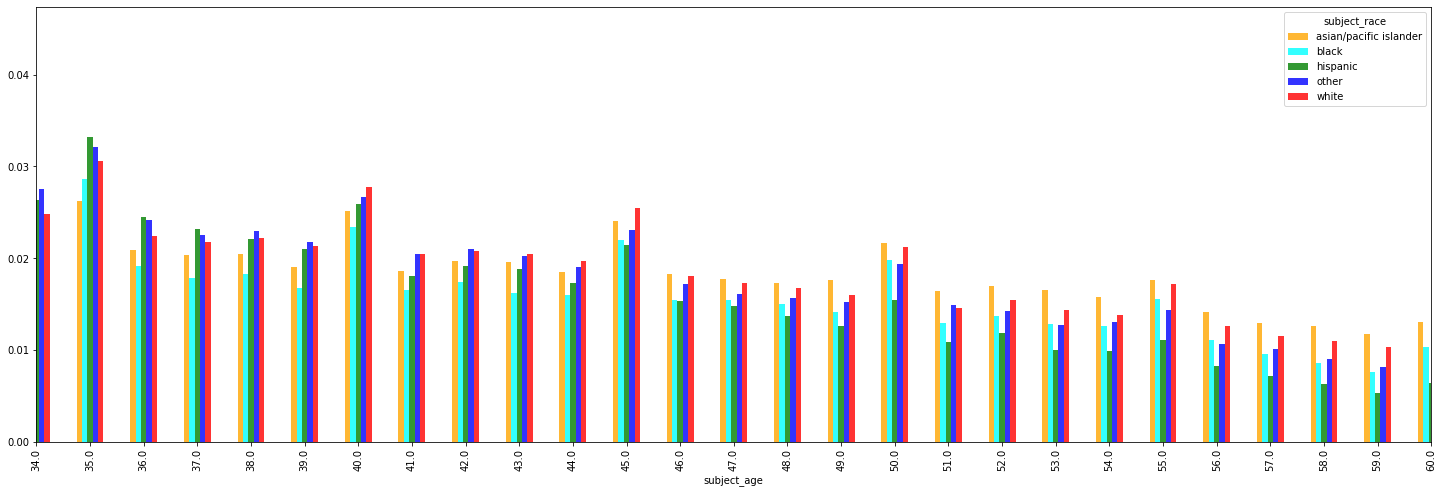

In [0]:
fig, ax = plt.subplots()
pd.crosstab(index=df.subject_age,columns=df.subject_race,normalize='columns' ).plot(kind='bar', 
                                                                                    figsize=(25,8), 
                                                                                    color=color, 
                                                                                    alpha=0.8, 
                                                                                    legend=True, 
                                                                                    ax=ax)
ax.set_xlim([24,50])
plt.show()